In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress



# Summary Statistics

In [17]:
# reading a saved data
game_avg_df = pd.read_csv("Game_Data/game_avg.csv")
game_mode_df = pd.read_csv("Game_Data/game_mode.csv")
genre_df = pd.read_csv("Game_Data/genre.csv")
release_df = pd.read_csv("Game_Data/released_date.csv")
dev_df = pd.read_csv("Game_Data/developer.csv")
pub_df = pd.read_csv("Game_Data/publisher.csv")

In [3]:
# game average summary using describe
game_avg_df = game_avg_df[['Title' ,'Average Score' ,'Score Count']]

game_avg_df.describe()

,Average Score,Score Count
count,415.000000,415.000000
mean,67.719716,8.074699
std,14.002776,17.444784
min,0.000000,1.000000
25%,60.000000,2.000000
50%,70.000000,3.000000
75%,80.000000,8.000000
max,96.411723,166.000000


In [5]:
# game mode summary using value counts
game_mode_df["Game Modes"].value_counts()


Game Modes
Single player                         369
Multiplayer                           202
Co-operative                          139
Massively Multiplayer Online (MMO)     39
Battle Royale                          10
Split screen                            7
Name: count, dtype: int64

In [6]:
# genre summary using value counts
genre_df["Genres"].value_counts()

Genres
Indie                         344
Adventure                     184
Simulator                     175
Role-playing (RPG)            158
Strategy                      150
Shooter                        76
Arcade                         36
Racing                         27
Puzzle                         26
Sport                          23
Real Time Strategy (RTS)       18
Fighting                       18
Platform                       18
Card & Board Game              17
Tactical                       16
Hack and slash/Beat 'em up     14
Turn-based strategy (TBS)      12
Point-and-click                 7
Music                           6
Visual Novel                    4
MOBA                            3
Name: count, dtype: int64

In [7]:
# release date summary using value counts
release_df["Dates"].value_counts()


Dates
TBD             34
2024            10
Jul 20, 2023     9
Sep 12, 2023     8
Oct 22, 2020     8
                ..
Dec 23, 2021     1
May 27, 2023     1
Jan 28, 2021     1
Nov 01, 2019     1
Sep 08, 2020     1
Name: count, Length: 604, dtype: int64

In [8]:
# platform summary using value counts
release_df["Platforms"].value_counts()

Platforms
PC (Microsoft Windows)    489
Nintendo Switch           125
Mac                       119
Xbox One                   88
Linux                      85
PlayStation 4              83
Xbox Series X|S            44
PlayStation 5              38
iOS                        22
Android                    18
PlayStation VR             17
SteamVR                    15
Oculus Quest                9
Meta Quest 2                9
Oculus VR                   6
Oculus Rift                 6
PlayStation VR2             4
Web browser                 4
Windows Mixed Reality       3
Google Stadia               2
DOS                         2
PlayStation 2               1
Name: count, dtype: int64

In [9]:
# region summary using value counts
release_df["Regions"].value_counts()

Regions
Worldwide        987
North America    135
Europe            57
Japan              5
Asia               2
Australia          2
Korea              1
Name: count, dtype: int64

In [10]:
# developer summary using value counts
dev_df["Developers"].value_counts()

Developers
Hyper Hippo Entertainment    3
Chasing Carrots              2
Jutsu Games                  2
Asmodee Digital              2
Kyodai                       2
                            ..
Overall adventures ltd       1
Slavic Magic                 1
Crate Entertainment          1
Stray Bombay                 1
Kindred Games                1
Name: count, Length: 417, dtype: int64

In [11]:
# publisher summary using value counts
pub_df["Publishers"].value_counts()

Publishers
Iceberg Interactive            5
Forever Entertainment S. A.    4
Team17                         3
Plug In Digital                3
The Irregular Corporation      3
                              ..
Ben Johnson (bencelot)         1
Snail Games                    1
Ballon Moose Games             1
Ziff Davis Media               1
All Parts Connected            1
Name: count, Length: 397, dtype: int64

# Visualizations

In [19]:
# Bin/Categorize average score into letter grades
# Define the bins and labels for the categories
bins = [0,25,50,75,100]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column with categorical values based on binning the 'NumericValues' column
game_avg_df['Grade'] = pd.cut(game_avg_df['Average Score'], bins=bins, labels=labels, include_lowest=True)
game_avg_df= game_avg_df[["Title", "Average Score", "Grade", "Score Count"]]
game_avg_df


,Title,Average Score,Grade,Score Count
0,Valheim,87.993753,Very High,166
1,Palworld,70.710829,High,163
2,7 Days to Die,54.106972,High,141
3,Satisfactory,74.774596,High,110
4,Project Zomboid,82.131361,Very High,106
...,...,...,...,...
410,Final Assault,70.000000,High,1
411,BoxVR,80.000000,Very High,1
412,Sipho,70.000000,High,1
413,The Snowboard Game,60.000000,High,1


In [15]:
# summary of how many games in each letter grade using value counts
game_avg_df["Grade"].value_counts()

Grade
High         222
Very High    130
Medium        57
Low            6
Name: count, dtype: int64

## Regions and Average Score Trends (Pie chart)

In [21]:
# 
release_df['Grade'] = pd.cut(release_df['Average Score'], bins=bins, labels=labels, include_lowest=True)
release_df= release_df[[ "Title", "Average Score", "Grade", "Score Count","Dates","Platforms","Regions"]]
release_df


,Title,Average Score,Grade,Score Count,Dates,Platforms,Regions
0,Valheim,87.993753,Very High,166,"Mar 14, 2023",Xbox One,Worldwide
1,Valheim,87.993753,Very High,166,"Mar 14, 2023",Xbox Series X|S,Worldwide
2,Valheim,87.993753,Very High,166,"Sep 16, 2022",Xbox One,North America
3,Valheim,87.993753,Very High,166,"Sep 16, 2022",Xbox Series X|S,North America
4,Valheim,87.993753,Very High,166,"Feb 02, 2021",PC (Microsoft Windows),Worldwide
...,...,...,...,...,...,...,...
1184,Sipho,70.000000,High,1,"Nov 13, 2018",PC (Microsoft Windows),Worldwide
1185,Sipho,70.000000,High,1,"Nov 13, 2018",Mac,Worldwide
1186,Sipho,70.000000,High,1,"Nov 13, 2018",Linux,Worldwide
1187,The Snowboard Game,60.000000,High,1,"Apr 24, 2018",PC (Microsoft Windows),Worldwide


In [24]:
released_top_rated_df =release_df[release_df["Grade"]=="Very High"].groupby("Regions")["Grade"].count()
released_top_rated_df

Regions
Europe            10
North America     30
Worldwide        302
Name: Grade, dtype: int64

## Genre and Average Score (Stacked bar chart)

In [ ]:
# genre graphs 
#genre_df.groupby("Genres")["Average Score"].mean()
genre_average = genre_df.groupby("Genres")["Average Score"].mean()
genre_average

Genres
Adventure                     66.001421
Arcade                        69.395032
Card & Board Game             72.193049
Fighting                      70.485443
Hack and slash/Beat 'em up    71.270468
Indie                         67.000865
MOBA                          48.219199
Music                         59.428325
Platform                      69.363834
Point-and-click               75.081264
Puzzle                        70.135991
Racing                        68.446997
Real Time Strategy (RTS)      69.250815
Role-playing (RPG)            66.480939
Shooter                       66.767917
Simulator                     67.948971
Sport                         73.272496
Strategy                      67.854874
Tactical                      70.796077
Turn-based strategy (TBS)     70.274006
Visual Novel                  71.936218
Name: Average Score, dtype: float64

## Genres and Average Score (Stacked bar chart)

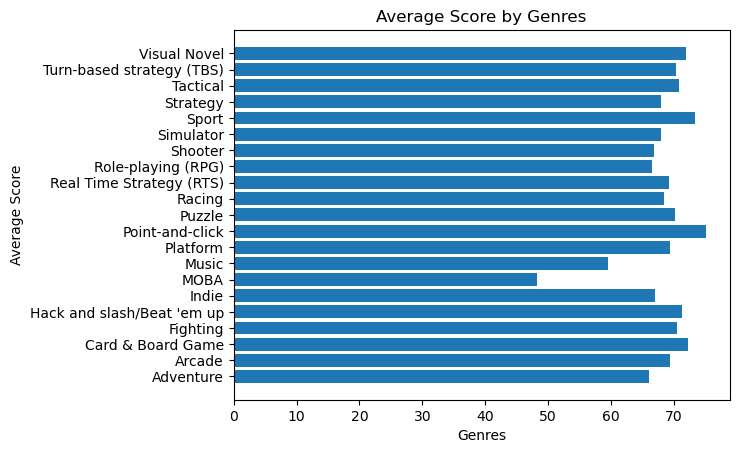

In [ ]:
plt.barh(genre_average.index,genre_average.values)
plt.xlabel('Genres')
plt.ylabel('Average Score')
#plt.xticks(rotation=90)
plt.title("Average Score by Genres")
plt.show()

In [ ]:
mode_average = game_mode_df.groupby("Game Modes")["Average Score"].mean()
mode_average

Game Modes
Battle Royale                         69.992044
Co-operative                          66.806289
Massively Multiplayer Online (MMO)    66.179110
Multiplayer                           67.533027
Single player                         67.854020
Split screen                          61.863682
Name: Average Score, dtype: float64

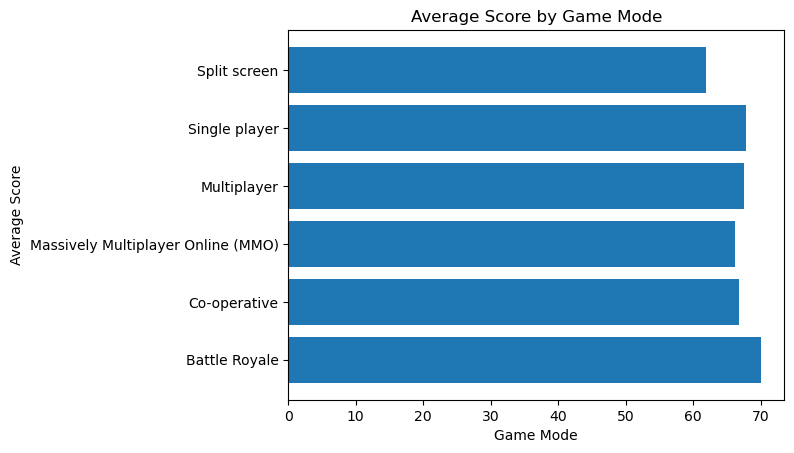

In [ ]:
plt.barh(mode_average.index,mode_average.values)
plt.xlabel('Game Mode')
plt.ylabel('Average Score')
#plt.xticks(rotation=90)
plt.title("Average Score by Game Mode")
plt.show()


# Release Dates, Platform, and Average Score (Line Chart)